In [7]:
# Tomita 4
import torch
import torch.nn as nn
import math 
import os
import copy
import numpy as np
import matplotlib.pyplot as plt

In [8]:
#print("Current Working Directory:", os.getcwd())
os.chdir( '/home/jupyter-nadia/bachelor-arbeit')

In [9]:
import Experiments.Model as Model
from Experiments.Pre_process_data import stats, stats_avg, min_max_stats

In [10]:
# get stats of language
max, train_src, train_tgt, bin0_src, bin0_tgt, bin1_src, bin1_tgt = stats('data/Data_from_paper/Tomita-4')
print('max_len:', max, '\ntrain_src:', train_src, '\ntrain_tgt:', train_tgt, '\nbin0_src:', bin0_src, '\nbin0_tgt:', bin0_tgt, '\nbin1_src:', bin1_src, '\nbin1_tgt:', bin1_tgt)


max_len: 100 
train_src: 10000 
train_tgt: 10000 
bin0_src: 2000 
bin0_tgt: 2000 
bin1_src: 2000 
bin1_tgt: 2000


In [11]:
#avg
max, train_src, train_tgt, bin0_src, bin0_tgt, bin1_src, bin1_tgt = stats_avg('data/Data_from_paper/Tomita-4')
print('max_len:', max, '\ntrain_src:', train_src, '\ntrain_tgt:', train_tgt, '\nbin0_src:', bin0_src, '\nbin0_tgt:', bin0_tgt, '\nbin1_src:', bin1_src, '\nbin1_tgt:', bin1_tgt)

max_len: 100 
train_src: 29.4243 
train_tgt: 58.8486 
bin0_src: 29.324 
bin0_tgt: 58.648 
bin1_src: 75.3085 
bin1_tgt: 150.617


In [12]:
#min,max
train_src, train_tgt, bin0_src, bin0_tgt, bin1_src, bin1_tgt = min_max_stats('data/Data_from_paper/Tomita-4')
print('\ntrain_src:', train_src, '\ntrain_tgt:', train_tgt, '\nbin0_src:', bin0_src, '\nbin0_tgt:', bin0_tgt, '\nbin1_src:', bin1_src, '\nbin1_tgt:', bin1_tgt)


train_src: [1, 50] 
train_tgt: [2, 100] 
bin0_src: [1, 50] 
bin0_tgt: [2, 100] 
bin1_src: [51, 100] 
bin1_tgt: [102, 200]


In [17]:
# initialize the plot values for accuracy 
bin1 = [0,0,0,0,0,0,0,0]  
bin0 = [0,0,0,0,0,0,0,0]  
bin1_uni = [0,0,0,0,0,0,0,0]  
bin0_uni = [0,0,0,0,0,0,0,0]    

In [14]:
# 1. Recurrent (# 6 layers in the main code )
# lesser layers give us slightly worse accuracy
# to beat 4 layers 71%

In [30]:
# Tomita 4:
url = 'data/Data_from_paper/Tomita-4'
alibi = False
universal = False
no_posi_encoding = False
rope = False
tomita_4_rec = Model.run_model(url, learning_rate = 0.001, batch_size = 32, embedding_dim =32, nheads= 8, split = 0.8, optimizer = 'RMSPROP', inner_layer_dim = 32, scheduler_lr= 200000, dropout = 0.1, alibi = alibi, pos_enc= 'recurrent', no_posi_encoding= no_posi_encoding, universal = universal, layer_number_main= 4, rope = rope)

In [31]:
epochs = 100
tomita_4_rec.train_eval(epochs)

Epoch [1/100], Loss: 0.015845, dev Accuracy: 69.95%
Epoch [2/100], Loss: 0.000515, dev Accuracy: 98.85%
Epoch [3/100], Loss: 0.000505, dev Accuracy: 98.65%
Epoch [4/100], Loss: 0.000015, dev Accuracy: 99.95%
Epoch [5/100], Loss: 0.000003, dev Accuracy: 100.00%
Epoch [6/100], Loss: 0.000003, dev Accuracy: 100.00%
Epoch [7/100], Loss: 0.000003, dev Accuracy: 100.00%
Epoch [8/100], Loss: 0.000042, dev Accuracy: 99.85%
Epoch [9/100], Loss: 0.000000, dev Accuracy: 100.00%
Epoch [10/100], Loss: 0.000000, dev Accuracy: 100.00%
Epoch [11/100], Loss: 0.000000, dev Accuracy: 100.00%
Epoch [12/100], Loss: 0.000001, dev Accuracy: 100.00%
Epoch [13/100], Loss: 0.000001, dev Accuracy: 100.00%
Epoch [14/100], Loss: 0.000000, dev Accuracy: 100.00%
Epoch [15/100], Loss: 0.000000, dev Accuracy: 100.00%
Epoch [16/100], Loss: 0.000000, dev Accuracy: 100.00%
Epoch [17/100], Loss: 0.000000, dev Accuracy: 100.00%
Epoch [18/100], Loss: 0.001354, dev Accuracy: 96.50%
Epoch [19/100], Loss: 0.000000, dev Accurac

In [32]:
bin0[5] = tomita_4_rec.test(0)

accuracy of all bin 0 is:  100.0 %


In [33]:
bin1[5] = tomita_4_rec.test(1)

accuracy of all bin 1 is:  31.7 %


In [34]:
rec, rec_n = tomita_4_rec.get_losses('Recurrent')

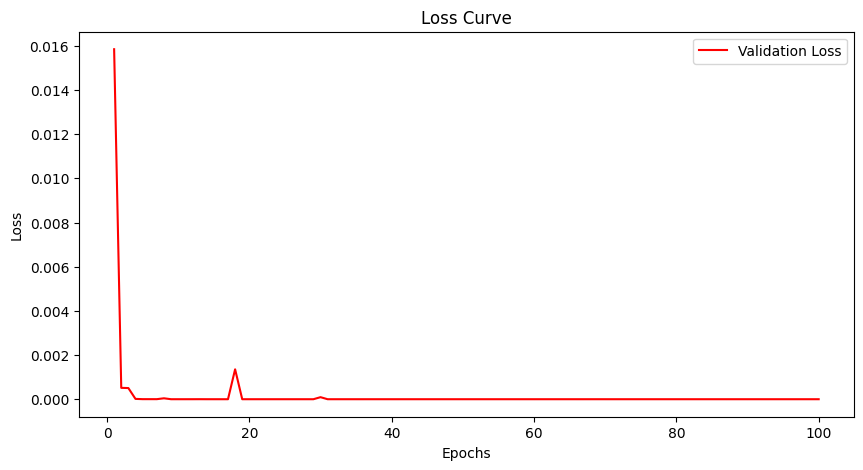

In [35]:
tomita_4_rec.visualize(epochs)

In [28]:
#2. Universal
# No posi encoding

In [65]:
url = 'data/Data_from_paper/Tomita-4'
alibi = False
no_posi_encoding = True
universal = True
tomita_4_uni = Model.run_model(url, learning_rate = 0.001, batch_size = 32, embedding_dim =32, nheads= 8, split = 0.8, optimizer = 'RMSPROP', inner_layer_dim = 32, scheduler_lr= 200000, dropout = 0.0, alibi = alibi, pos_enc= 'recurrent', universal = universal, no_posi_encoding= no_posi_encoding, num_layers =8)

In [66]:
epochs = 100
tomita_4_uni.train_eval(epochs)

Epoch [1/100], Loss: 0.013961, dev Accuracy: 66.20%
Epoch [2/100], Loss: 0.007718, dev Accuracy: 73.75%
Epoch [3/100], Loss: 0.007857, dev Accuracy: 73.60%
Epoch [4/100], Loss: 0.007802, dev Accuracy: 73.75%
Epoch [5/100], Loss: 0.012199, dev Accuracy: 64.70%
Epoch [6/100], Loss: 0.007805, dev Accuracy: 73.75%
Epoch [7/100], Loss: 0.007752, dev Accuracy: 73.70%
Epoch [8/100], Loss: 0.007717, dev Accuracy: 73.75%
Epoch [9/100], Loss: 0.007588, dev Accuracy: 73.75%
Epoch [10/100], Loss: 0.007714, dev Accuracy: 73.75%
Epoch [11/100], Loss: 0.007629, dev Accuracy: 73.75%
Epoch [12/100], Loss: 0.007623, dev Accuracy: 73.75%
Epoch [13/100], Loss: 0.007733, dev Accuracy: 73.75%
Epoch [14/100], Loss: 0.007624, dev Accuracy: 73.60%
Epoch [15/100], Loss: 0.007677, dev Accuracy: 73.75%
Epoch [16/100], Loss: 0.007659, dev Accuracy: 73.75%
Epoch [17/100], Loss: 0.007602, dev Accuracy: 73.70%
Epoch [18/100], Loss: 0.007602, dev Accuracy: 73.75%
Epoch [19/100], Loss: 0.007663, dev Accuracy: 73.70%
Ep

In [67]:
bin0_uni[0] = tomita_4_uni.test(0)

accuracy of all bin 0 is:  74.7 %


In [73]:
bin1_uni[0] =  tomita_4_uni.test(1)

accuracy of all bin 1 is:  72.3 %


In [72]:
uni, uni_n = tomita_4_uni.get_losses('Universal')

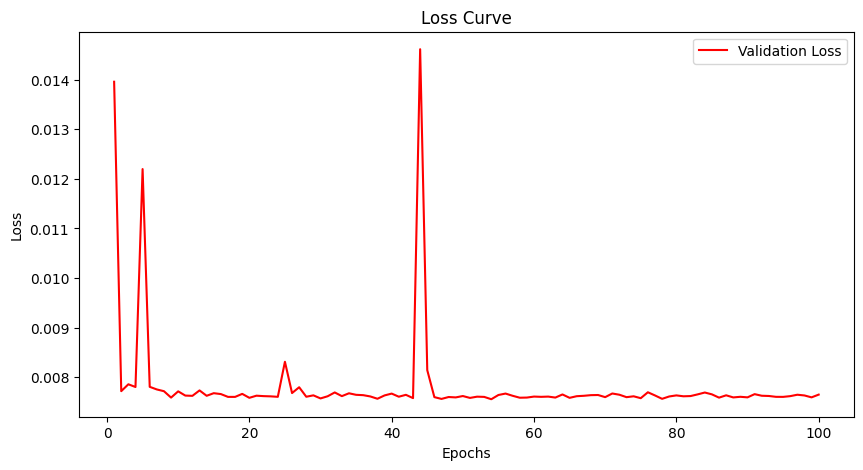

In [70]:
 tomita_4_uni.visualize(epochs)

In [13]:
#3. No positional encoding: 

In [14]:
# Tomita 4:
url = 'data/Data_from_paper/Tomita-4'
alibi = False
universal = False
no_posi_encoding = True
tomita_4_np = Model.run_model(url, learning_rate = 0.001, batch_size = 32, embedding_dim =32, nheads= 8, split = 0.8, optimizer = 'RMSPROP', inner_layer_dim = 32, scheduler_lr= 200000, dropout = 0.0, alibi = alibi, no_posi_encoding= no_posi_encoding, layer_number_main= 6)
# when we change the number of layers from 8 to 4 we get better bin1 11.85% ->15%) but worse  bin0 (100% -> 56%)

In [15]:
epochs = 100
tomita_4_np.train_eval(epochs)

Epoch [1/100], Loss: 0.012259, dev Accuracy: 69.70%
Epoch [2/100], Loss: 0.007410, dev Accuracy: 74.75%
Epoch [3/100], Loss: 0.007486, dev Accuracy: 74.75%
Epoch [4/100], Loss: 0.007413, dev Accuracy: 74.65%
Epoch [5/100], Loss: 0.007406, dev Accuracy: 74.75%
Epoch [6/100], Loss: 0.007507, dev Accuracy: 74.75%
Epoch [7/100], Loss: 0.102266, dev Accuracy: 14.45%
Epoch [8/100], Loss: 0.007391, dev Accuracy: 74.75%
Epoch [9/100], Loss: 0.007414, dev Accuracy: 74.75%
Epoch [10/100], Loss: 0.007419, dev Accuracy: 74.75%
Epoch [11/100], Loss: 0.007393, dev Accuracy: 74.75%
Epoch [12/100], Loss: 0.007406, dev Accuracy: 74.75%
Epoch [13/100], Loss: 0.007454, dev Accuracy: 74.75%
Epoch [14/100], Loss: 0.007493, dev Accuracy: 74.75%
Epoch [15/100], Loss: 0.007359, dev Accuracy: 74.75%
Epoch [16/100], Loss: 0.007416, dev Accuracy: 74.75%
Epoch [17/100], Loss: 0.007394, dev Accuracy: 74.75%
Epoch [18/100], Loss: 0.007429, dev Accuracy: 74.75%
Epoch [19/100], Loss: 0.007374, dev Accuracy: 74.75%
Ep

In [18]:
bin0[0] = tomita_4_np.test(0)

accuracy of all bin 0 is:  74.7 %


In [19]:
bin1[0] = tomita_4_np.test(1)

accuracy of all bin 1 is:  71.45 %


In [20]:
nop, nop_n = tomita_4_np.get_losses('No Positional Encoding')

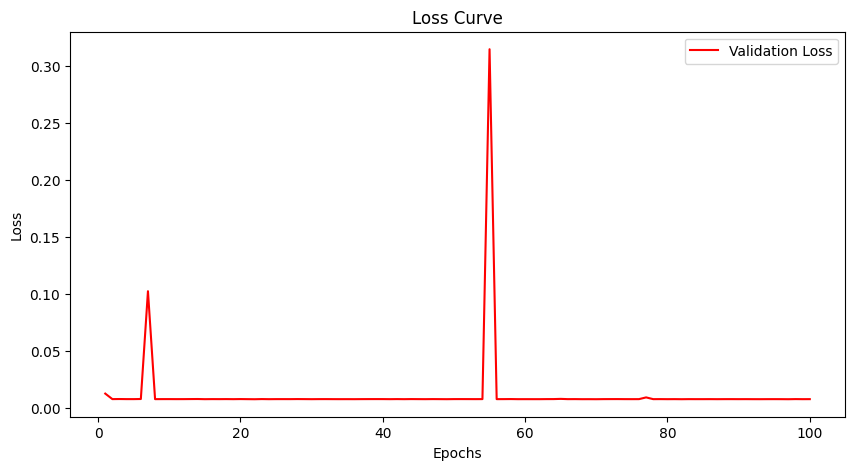

In [21]:
 tomita_4_np.visualize(epochs)

In [22]:
#4. Standard Positional encoding

In [6]:
# Tomita 4:
url = 'data/Data_from_paper/Tomita-4'
alibi = False
universal = False
no_posi_encoding = False
tomita_4_sin = Model.run_model(url, learning_rate = 0.001, batch_size = 32, embedding_dim =32, nheads= 4, split = 0.8, optimizer = 'RMSPROP', inner_layer_dim = 32, scheduler_lr= 200000, dropout = 0.0, alibi = alibi, no_posi_encoding= no_posi_encoding, layer_number_main= 4)
# when we change the number of layers from 8 to 4 we get better bin1 11.85% ->15.2%) but worse  bin0 (100% -> 56.4%)

In [7]:
epochs = 100
tomita_4_sin.train_eval(epochs)

Epoch [1/100], Loss: 0.004881, dev Accuracy: 89.30%
Epoch [2/100], Loss: 0.000220, dev Accuracy: 99.50%
Epoch [3/100], Loss: 0.000026, dev Accuracy: 99.95%
Epoch [4/100], Loss: 0.000001, dev Accuracy: 100.00%
Epoch [5/100], Loss: 0.000000, dev Accuracy: 100.00%
Epoch [6/100], Loss: 0.000000, dev Accuracy: 100.00%
Epoch [7/100], Loss: 0.000000, dev Accuracy: 100.00%
Epoch [8/100], Loss: 0.000000, dev Accuracy: 100.00%
Epoch [9/100], Loss: 0.000000, dev Accuracy: 100.00%
Epoch [10/100], Loss: 0.000000, dev Accuracy: 100.00%
Epoch [11/100], Loss: 0.000000, dev Accuracy: 100.00%
Epoch [12/100], Loss: 0.000000, dev Accuracy: 100.00%
Epoch [13/100], Loss: 0.000000, dev Accuracy: 100.00%
Epoch [14/100], Loss: 0.000000, dev Accuracy: 100.00%
Epoch [15/100], Loss: 0.000000, dev Accuracy: 100.00%
Epoch [16/100], Loss: 0.000000, dev Accuracy: 100.00%
Epoch [17/100], Loss: 0.000000, dev Accuracy: 100.00%
Epoch [18/100], Loss: 0.000000, dev Accuracy: 100.00%
Epoch [19/100], Loss: 0.000000, dev Accu

In [8]:
bin0[1] = tomita_4_sin.test(0)

accuracy of all bin 0 is:  100.0 %


NameError: name 'bin0' is not defined

In [ ]:
bin1[1] = tomita_4_sin.test(1)

In [ ]:
sin, sin_n = tomita_4_sin.get_losses('Sin')

In [ ]:
tomita_4_sin.visualize(epochs)

In [ ]:
#5. Cos Positional encoding

In [116]:
# Tomita 4:
url = 'data/Data_from_paper/Tomita-4'
alibi = False
universal = False
no_posi_encoding = False
tomita_4_cos = Model.run_model(url, learning_rate = 0.001, batch_size = 32, embedding_dim =32, nheads= 8, split = 0.8, optimizer = 'RMSPROP', inner_layer_dim = 32, scheduler_lr= 200000, dropout = 0.0, alibi = alibi, pos_enc= 'cos', no_posi_encoding= no_posi_encoding, layer_number_main= 4)


In [117]:
epochs = 100
tomita_4_cos.train_eval(epochs)

Epoch [1/100], Loss: 0.041798, dev Accuracy: 35.40%
Epoch [2/100], Loss: 0.014318, dev Accuracy: 63.00%
Epoch [3/100], Loss: 0.017012, dev Accuracy: 58.05%
Epoch [4/100], Loss: 0.008042, dev Accuracy: 72.70%
Epoch [5/100], Loss: 0.007404, dev Accuracy: 73.85%
Epoch [6/100], Loss: 0.008611, dev Accuracy: 72.55%
Epoch [7/100], Loss: 0.007270, dev Accuracy: 74.20%
Epoch [8/100], Loss: 0.008327, dev Accuracy: 71.55%
Epoch [9/100], Loss: 0.007345, dev Accuracy: 74.20%
Epoch [10/100], Loss: 0.007279, dev Accuracy: 74.25%
Epoch [11/100], Loss: 0.007545, dev Accuracy: 73.80%
Epoch [12/100], Loss: 0.007328, dev Accuracy: 74.20%
Epoch [13/100], Loss: 0.007325, dev Accuracy: 74.20%
Epoch [14/100], Loss: 0.199052, dev Accuracy: 0.45%
Epoch [15/100], Loss: 0.007339, dev Accuracy: 74.25%
Epoch [16/100], Loss: 0.007256, dev Accuracy: 74.25%
Epoch [17/100], Loss: 0.007259, dev Accuracy: 74.25%
Epoch [18/100], Loss: 0.007256, dev Accuracy: 74.25%
Epoch [19/100], Loss: 0.007315, dev Accuracy: 74.10%
Epo

In [118]:
bin0[2] = tomita_4_cos.test(0)

accuracy of all bin 0 is:  74.7 %


In [119]:
bin1[2] = tomita_4_cos.test(1)

accuracy of all bin 1 is:  63.75 %


In [120]:
cos, cos_n = tomita_4_cos.get_losses('Cos')

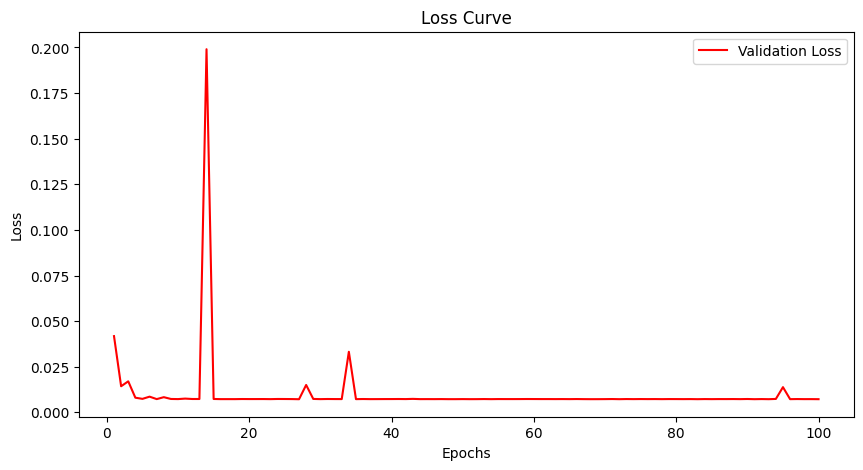

In [41]:
tomita_4_cos.visualize(epochs)

In [42]:
#6. learnable 

In [91]:
# Tomita 4:
url = 'data/Data_from_paper/Tomita-4'
alibi = False
universal = False
no_posi_encoding = False
tomita_4_learn = Model.run_model(url, learning_rate = 0.001, batch_size = 32, embedding_dim =16, nheads= 8, split = 0.8, optimizer = 'RMSPROP', inner_layer_dim = 32, scheduler_lr= 200000, dropout = 0.0, alibi = alibi, pos_enc= 'learnable', no_posi_encoding= no_posi_encoding, layer_number_main= 4)

In [92]:
epochs = 100
tomita_4_learn.train_eval(epochs)

Epoch [1/100], Loss: 0.052373, dev Accuracy: 25.20%
Epoch [2/100], Loss: 0.023664, dev Accuracy: 50.65%
Epoch [3/100], Loss: 0.013058, dev Accuracy: 66.00%
Epoch [4/100], Loss: 0.011017, dev Accuracy: 67.95%
Epoch [5/100], Loss: 0.007598, dev Accuracy: 74.80%
Epoch [6/100], Loss: 0.007605, dev Accuracy: 74.70%
Epoch [7/100], Loss: 0.007443, dev Accuracy: 75.20%
Epoch [8/100], Loss: 0.007344, dev Accuracy: 75.25%
Epoch [9/100], Loss: 0.007494, dev Accuracy: 75.25%
Epoch [10/100], Loss: 0.007376, dev Accuracy: 75.20%
Epoch [11/100], Loss: 0.007418, dev Accuracy: 75.25%
Epoch [12/100], Loss: 0.007433, dev Accuracy: 75.25%
Epoch [13/100], Loss: 0.007391, dev Accuracy: 75.25%
Epoch [14/100], Loss: 0.007376, dev Accuracy: 75.25%
Epoch [15/100], Loss: 0.007389, dev Accuracy: 75.25%
Epoch [16/100], Loss: 0.007332, dev Accuracy: 75.25%
Epoch [17/100], Loss: 0.007393, dev Accuracy: 75.25%
Epoch [18/100], Loss: 0.007459, dev Accuracy: 75.25%
Epoch [19/100], Loss: 0.007406, dev Accuracy: 75.25%
Ep

In [93]:
bin0[3] = tomita_4_learn.test(0)

accuracy of all bin 0 is:  74.7 %


In [94]:
bin1[3] = tomita_4_learn.test(1)

accuracy of all bin 1 is:  76.5 %


In [95]:
learn, learn_n = tomita_4_learn.get_losses('Learnable')

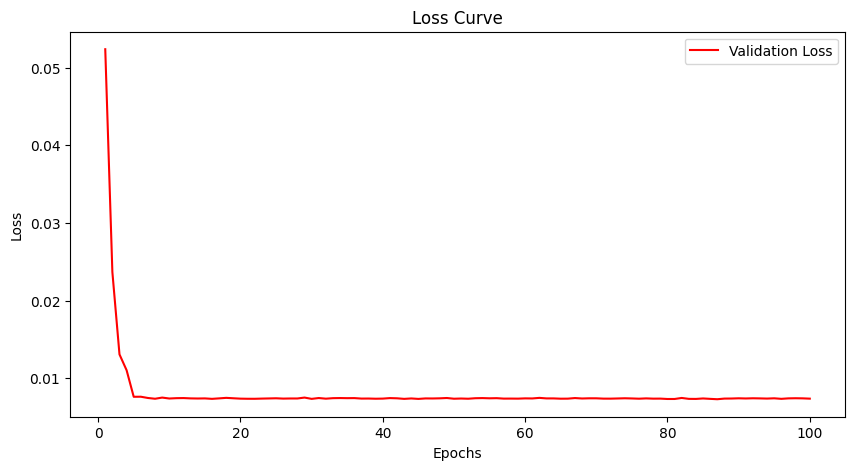

In [96]:
tomita_4_learn.visualize(epochs)

In [49]:
#7. learnable Period 

In [8]:
# Tomita 4:
url = 'data/Data_from_paper/Tomita-4'
alibi = False
universal = False
no_posi_encoding = False
tomita_4_lp = Model.run_model(url, learning_rate = 0.001, batch_size = 32, embedding_dim =32, nheads= 8, split = 0.8, optimizer = 'RMSPROP', inner_layer_dim = 64, scheduler_lr= 200000, dropout = 0.1, alibi = alibi, pos_enc= 'learn_period', no_posi_encoding= no_posi_encoding, layer_number_main= 4)

In [9]:
epochs = 200
tomita_4_lp.train_eval(epochs)

Epoch [1/200], Loss: 0.052617, dev Accuracy: 36.95%
Epoch [2/200], Loss: 0.017405, dev Accuracy: 65.15%
Epoch [3/200], Loss: 0.011734, dev Accuracy: 46.75%
Epoch [4/200], Loss: 0.007588, dev Accuracy: 47.60%
Epoch [5/200], Loss: 0.000601, dev Accuracy: 98.45%
Epoch [6/200], Loss: 0.001709, dev Accuracy: 97.30%
Epoch [7/200], Loss: 0.004285, dev Accuracy: 88.95%
Epoch [8/200], Loss: 0.000084, dev Accuracy: 99.95%
Epoch [9/200], Loss: 0.000006, dev Accuracy: 100.00%
Epoch [10/200], Loss: 0.000003, dev Accuracy: 100.00%
Epoch [11/200], Loss: 0.014096, dev Accuracy: 48.75%
Epoch [12/200], Loss: 0.000434, dev Accuracy: 99.85%
Epoch [13/200], Loss: 0.000064, dev Accuracy: 100.00%
Epoch [14/200], Loss: 0.000000, dev Accuracy: 100.00%
Epoch [15/200], Loss: 0.000000, dev Accuracy: 100.00%
Epoch [16/200], Loss: 0.000000, dev Accuracy: 100.00%
Epoch [17/200], Loss: 0.000000, dev Accuracy: 100.00%
Epoch [18/200], Loss: 0.000002, dev Accuracy: 100.00%
Epoch [19/200], Loss: 0.000001, dev Accuracy: 1

In [12]:
bin0[4] = tomita_4_lp.test(0)

accuracy of all bin 0 is:  100.0 %


In [13]:
bin1[4] = tomita_4_lp.test(1)

accuracy of all bin 1 is:  29.8 %


In [14]:
lp, lp_n = tomita_4_lp.get_losses('Learnable Period')

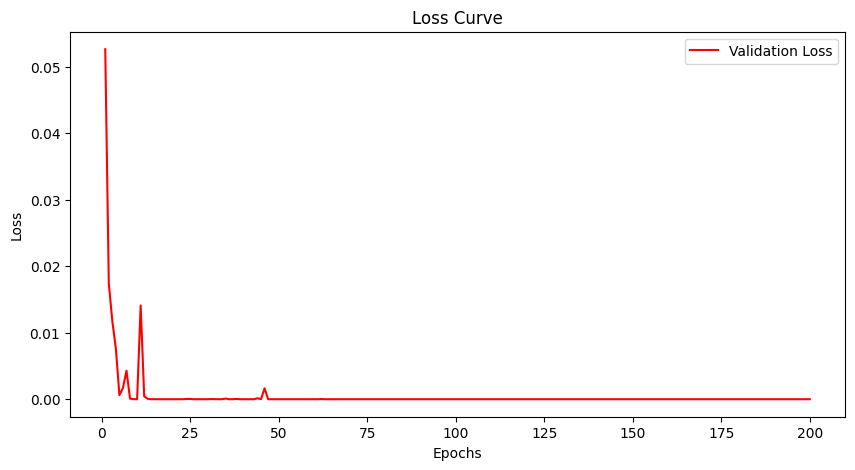

In [15]:
tomita_4_lp.visualize(epochs)

In [56]:
#8 rope

In [152]:
# Tomita 4:
url = 'data/Data_from_paper/Tomita-4'
alibi = False
universal = False
no_posi_encoding = False
rope= True
tomita_4_rope = Model.run_model(url, learning_rate = 0.001, batch_size = 32, embedding_dim =32, nheads= 8, split = 0.8, optimizer = 'RMSPROP', inner_layer_dim = 32, scheduler_lr= 200000, dropout = 0.0, alibi = alibi, no_posi_encoding= no_posi_encoding, universal = universal, layer_number_main= 6, rope= rope)

In [153]:
epochs = 100
tomita_4_rope.train_eval(epochs)

Epoch [1/100], Loss: 0.103696, dev Accuracy: 5.30%
Epoch [2/100], Loss: 0.048647, dev Accuracy: 35.95%
Epoch [3/100], Loss: 0.002043, dev Accuracy: 94.80%
Epoch [4/100], Loss: 0.000367, dev Accuracy: 99.00%
Epoch [5/100], Loss: 0.000028, dev Accuracy: 99.95%
Epoch [6/100], Loss: 0.000000, dev Accuracy: 100.00%
Epoch [7/100], Loss: 0.000017, dev Accuracy: 99.95%
Epoch [8/100], Loss: 0.000001, dev Accuracy: 100.00%
Epoch [9/100], Loss: 0.000000, dev Accuracy: 100.00%
Epoch [10/100], Loss: 0.000112, dev Accuracy: 99.75%
Epoch [11/100], Loss: 0.001877, dev Accuracy: 95.00%
Epoch [12/100], Loss: 0.000000, dev Accuracy: 100.00%
Epoch [13/100], Loss: 0.000048, dev Accuracy: 99.90%
Epoch [14/100], Loss: 0.000028, dev Accuracy: 99.90%
Epoch [15/100], Loss: 0.000000, dev Accuracy: 100.00%
Epoch [16/100], Loss: 0.000000, dev Accuracy: 100.00%
Epoch [17/100], Loss: 0.000053, dev Accuracy: 99.90%
Epoch [18/100], Loss: 0.057033, dev Accuracy: 43.25%
Epoch [19/100], Loss: 0.000042, dev Accuracy: 99.9

In [154]:
bin0[7] = tomita_4_rope.test(0)

accuracy of all bin 0 is:  100.0 %


In [155]:
bin1[7] = tomita_4_rope.test(1)

accuracy of all bin 1 is:  79.9 %


In [167]:
rope, rope_n = tomita_4_rope.get_losses('RoPE')

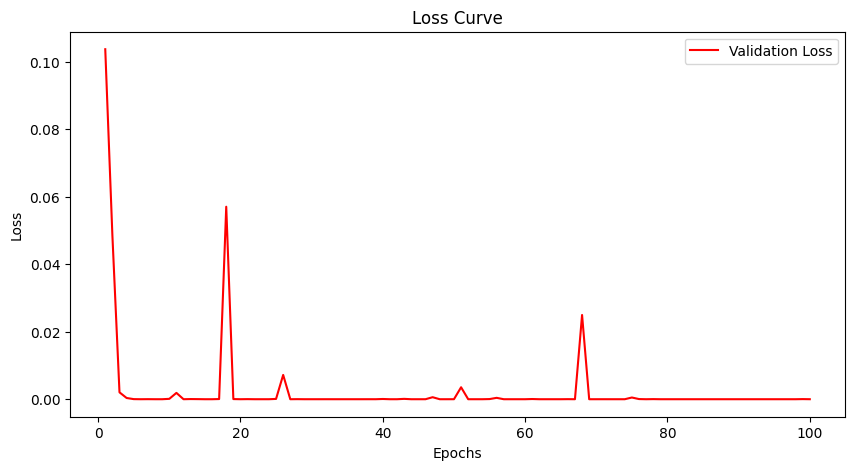

In [157]:
tomita_4_rope.visualize(epochs)

In [137]:
#9 Alibi

In [64]:
# ALIBI

In [190]:
# Tomita 4:
url = 'data/Data_from_paper/Tomita-4'
alibi = True
universal = False
no_posi_encoding = True
rope= False
tomita_4_alibi = Model.run_model(url, learning_rate = 0.001, batch_size = 32, embedding_dim =32, nheads= 8, split = 0.8, optimizer = 'RMSPROP', inner_layer_dim = 64, scheduler_lr= 200000, dropout = 0.0, alibi = alibi, pos_enc= 'recurrent', no_posi_encoding= no_posi_encoding, universal = universal, layer_number_main= 6, rope= rope)

In [191]:
epochs = 100
tomita_4_alibi.train_eval(epochs)

Epoch [1/100], Loss: 0.007039, dev Accuracy: 75.95%
Epoch [2/100], Loss: 0.007069, dev Accuracy: 75.95%
Epoch [3/100], Loss: 0.007053, dev Accuracy: 75.95%
Epoch [4/100], Loss: 0.007066, dev Accuracy: 75.95%
Epoch [5/100], Loss: 0.007069, dev Accuracy: 75.95%
Epoch [6/100], Loss: 0.007031, dev Accuracy: 75.95%
Epoch [7/100], Loss: 0.007032, dev Accuracy: 75.95%
Epoch [8/100], Loss: 0.007050, dev Accuracy: 75.95%
Epoch [9/100], Loss: 0.007083, dev Accuracy: 75.95%
Epoch [10/100], Loss: 0.007015, dev Accuracy: 75.95%
Epoch [11/100], Loss: 0.007028, dev Accuracy: 75.95%
Epoch [12/100], Loss: 0.007066, dev Accuracy: 75.95%
Epoch [13/100], Loss: 0.007061, dev Accuracy: 75.95%
Epoch [14/100], Loss: 0.007090, dev Accuracy: 75.95%
Epoch [15/100], Loss: 0.007104, dev Accuracy: 75.95%
Epoch [16/100], Loss: 0.007006, dev Accuracy: 75.95%
Epoch [17/100], Loss: 0.007064, dev Accuracy: 75.95%
Epoch [18/100], Loss: 0.007074, dev Accuracy: 75.95%
Epoch [19/100], Loss: 0.007152, dev Accuracy: 75.95%
Ep

In [192]:
bin0[6] = tomita_4_alibi.test(0)

accuracy of all bin 0 is:  74.7 %


In [193]:
bin1[6] = tomita_4_alibi.test(1)

accuracy of all bin 1 is:  76.5 %


In [194]:
alibi, alibi_n = tomita_4_alibi.get_losses('ALiBi')

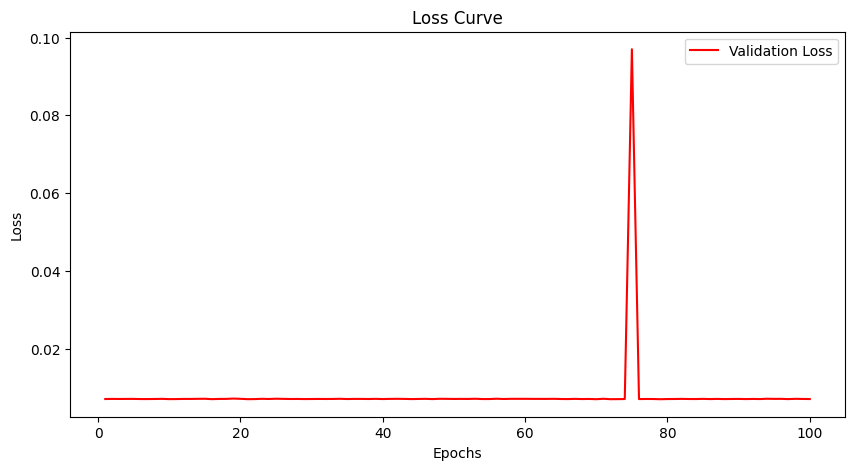

In [195]:
tomita_4_alibi.visualize(epochs)

In [71]:
#10. Combos uni+recurrent

In [13]:
# Tomita 4:

url = 'data/Data_from_paper/Tomita-4'
alibi = False
universal = True
no_posi_encoding = False
rope= False
tomita_4_uni_rec = Model.run_model(url, learning_rate = 0.001, batch_size = 32, embedding_dim =32, nheads= 8, split = 0.8, optimizer = 'RMSPROP', inner_layer_dim = 32, scheduler_lr= 200000, dropout = 0.0, alibi = alibi, pos_enc= 'recurrent', no_posi_encoding= no_posi_encoding, universal = universal, num_layers =6, rope= rope)

In [14]:
epochs = 100
tomita_4_uni_rec.train_eval(epochs)

Epoch [1/100], Loss: 0.002845, dev Accuracy: 95.75%
Epoch [2/100], Loss: 0.000008, dev Accuracy: 100.00%
Epoch [3/100], Loss: 0.000001, dev Accuracy: 100.00%
Epoch [4/100], Loss: 0.000302, dev Accuracy: 99.40%
Epoch [5/100], Loss: 0.000001, dev Accuracy: 100.00%
Epoch [6/100], Loss: 0.000000, dev Accuracy: 100.00%
Epoch [7/100], Loss: 0.000000, dev Accuracy: 100.00%
Epoch [8/100], Loss: 0.000000, dev Accuracy: 100.00%
Epoch [9/100], Loss: 0.000000, dev Accuracy: 100.00%
Epoch [10/100], Loss: 0.000000, dev Accuracy: 100.00%
Epoch [11/100], Loss: 0.000000, dev Accuracy: 100.00%
Epoch [12/100], Loss: 0.000000, dev Accuracy: 100.00%
Epoch [13/100], Loss: 0.000000, dev Accuracy: 100.00%
Epoch [14/100], Loss: 0.000000, dev Accuracy: 100.00%
Epoch [15/100], Loss: 0.000000, dev Accuracy: 100.00%
Epoch [16/100], Loss: 0.000000, dev Accuracy: 100.00%
Epoch [17/100], Loss: 0.000000, dev Accuracy: 100.00%
Epoch [18/100], Loss: 0.000000, dev Accuracy: 100.00%
Epoch [19/100], Loss: 0.000000, dev Acc

In [15]:
bin0_uni[5] = tomita_4_uni_rec.test(0)

accuracy of all bin 0 is:  100.0 %


In [16]:
bin1_uni[5] = tomita_4_uni_rec.test(1)

accuracy of all bin 1 is:  55.05 %


In [17]:
rec_uni, rec_uni_n = tomita_4_uni_rec.get_losses('Universal + Recurrent')

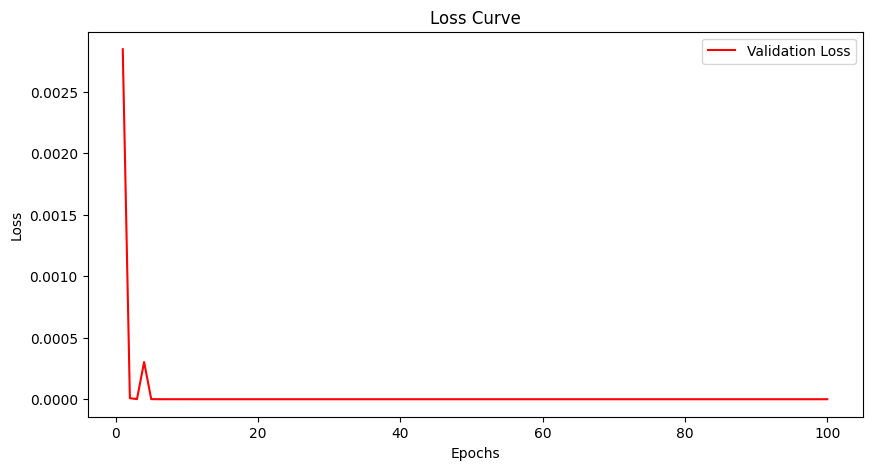

In [18]:
tomita_4_uni_rec.visualize(epochs)

In [19]:
#11. combos: universal + cos

In [20]:
# Tomita 4:
url = 'data/Data_from_paper/Tomita-4'
alibi = False
universal = True
no_posi_encoding = False
rope = False
tomita_4_uni_cos = Model.run_model(url, learning_rate = 0.001, batch_size = 32, embedding_dim =32, nheads= 8, split = 0.8, optimizer = 'RMSPROP', inner_layer_dim = 32, scheduler_lr= 200000, dropout = 0.0, alibi = alibi, pos_enc= 'cos',no_posi_encoding= no_posi_encoding, num_layers= 8, rope= rope)

In [21]:
epochs = 100
tomita_4_uni_cos.train_eval(epochs)

Epoch [1/100], Loss: 0.041798, dev Accuracy: 35.40%
Epoch [2/100], Loss: 0.014318, dev Accuracy: 63.00%
Epoch [3/100], Loss: 0.017012, dev Accuracy: 58.05%
Epoch [4/100], Loss: 0.008042, dev Accuracy: 72.70%
Epoch [5/100], Loss: 0.007404, dev Accuracy: 73.85%
Epoch [6/100], Loss: 0.008611, dev Accuracy: 72.55%
Epoch [7/100], Loss: 0.007270, dev Accuracy: 74.20%
Epoch [8/100], Loss: 0.008327, dev Accuracy: 71.55%
Epoch [9/100], Loss: 0.007345, dev Accuracy: 74.20%
Epoch [10/100], Loss: 0.007279, dev Accuracy: 74.25%
Epoch [11/100], Loss: 0.007545, dev Accuracy: 73.80%
Epoch [12/100], Loss: 0.007328, dev Accuracy: 74.20%
Epoch [13/100], Loss: 0.007325, dev Accuracy: 74.20%
Epoch [14/100], Loss: 0.199052, dev Accuracy: 0.45%
Epoch [15/100], Loss: 0.007339, dev Accuracy: 74.25%
Epoch [16/100], Loss: 0.007256, dev Accuracy: 74.25%
Epoch [17/100], Loss: 0.007259, dev Accuracy: 74.25%
Epoch [18/100], Loss: 0.007256, dev Accuracy: 74.25%
Epoch [19/100], Loss: 0.007315, dev Accuracy: 74.10%
Epo

In [22]:
bin0_uni[2] = tomita_4_uni_cos.test(0)

accuracy of all bin 0 is:  74.7 %


In [23]:
bin1_uni[2] = tomita_4_uni_cos.test(1)

accuracy of all bin 1 is:  63.75 %


In [24]:
cos_uni, cos_uni_n = tomita_4_uni_cos.get_losses('Universal + Cos')

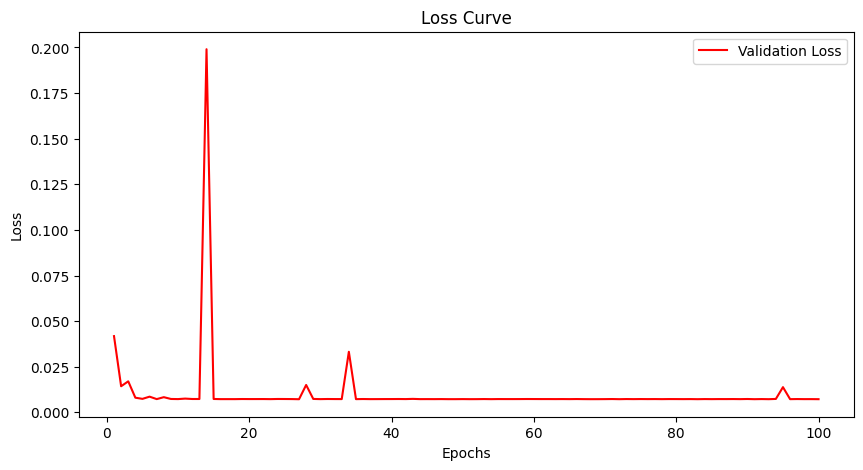

In [25]:
tomita_4_uni_cos.visualize(epochs)

In [26]:
#12. combos: universal + learnable

In [27]:
# Tomita 4:
url = 'data/Data_from_paper/Tomita-4'
alibi = False
universal = True
no_posi_encoding = False
rope = False
tomita_4_uni_learn = Model.run_model(url, learning_rate = 0.001, batch_size = 32, embedding_dim =32, nheads= 8, split = 0.8, optimizer = 'RMSPROP', inner_layer_dim = 32, scheduler_lr= 200000, dropout = 0.0, alibi = alibi, pos_enc= 'learnable',no_posi_encoding= no_posi_encoding, num_layers= 8, rope= rope)

In [28]:
epochs = 100
tomita_4_uni_learn.train_eval(epochs)

Epoch [1/100], Loss: 0.035933, dev Accuracy: 41.85%
Epoch [2/100], Loss: 0.012451, dev Accuracy: 65.85%
Epoch [3/100], Loss: 0.007961, dev Accuracy: 73.00%
Epoch [4/100], Loss: 0.016409, dev Accuracy: 46.80%
Epoch [5/100], Loss: 0.007341, dev Accuracy: 74.20%
Epoch [6/100], Loss: 0.007294, dev Accuracy: 74.25%
Epoch [7/100], Loss: 0.007302, dev Accuracy: 74.15%
Epoch [8/100], Loss: 0.007282, dev Accuracy: 74.25%
Epoch [9/100], Loss: 0.007352, dev Accuracy: 74.20%
Epoch [10/100], Loss: 0.007321, dev Accuracy: 74.15%
Epoch [11/100], Loss: 0.007282, dev Accuracy: 74.25%
Epoch [12/100], Loss: 0.007315, dev Accuracy: 74.25%
Epoch [13/100], Loss: 0.007440, dev Accuracy: 74.05%
Epoch [14/100], Loss: 0.007287, dev Accuracy: 74.25%
Epoch [15/100], Loss: 0.007332, dev Accuracy: 74.25%
Epoch [16/100], Loss: 0.007430, dev Accuracy: 73.95%
Epoch [17/100], Loss: 0.007257, dev Accuracy: 74.25%
Epoch [18/100], Loss: 0.007285, dev Accuracy: 74.15%
Epoch [19/100], Loss: 0.007268, dev Accuracy: 74.20%
Ep

In [29]:
bin0_uni[3] = tomita_4_uni_learn.test(0)

accuracy of all bin 0 is:  74.7 %


In [30]:
bin1_uni[3] = tomita_4_uni_learn.test(1)

accuracy of all bin 1 is:  67.35 %


In [31]:
learn_uni, learn_uni_n = tomita_4_uni_learn.get_losses('Universal + Learnable')

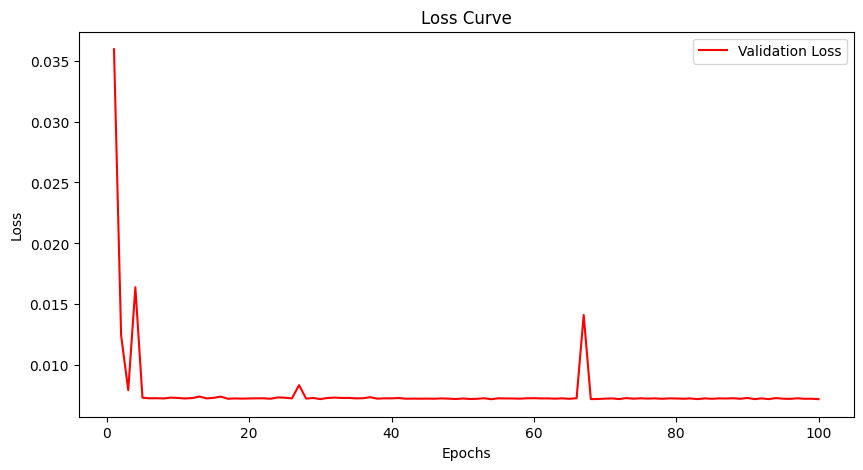

In [32]:
tomita_4_uni_learn.visualize(epochs)

In [33]:
#13. combos: universal + learnable period

In [177]:
# Tomita 4:
url = 'data/Data_from_paper/Tomita-4'
alibi = False
universal = True
no_posi_encoding = False
rope = False
tomita_4_uni_lp = Model.run_model(url, learning_rate = 0.001, batch_size = 32, embedding_dim =64, nheads= 8, split = 0.8, optimizer = 'RMSPROP', inner_layer_dim = 32, scheduler_lr= 200000, dropout = 0.0, alibi = alibi, pos_enc= 'learn_period',no_posi_encoding= no_posi_encoding, num_layers= 8, rope= rope)

In [178]:
epochs = 100
tomita_4_uni_lp .train_eval(epochs)

Epoch [1/100], Loss: 0.023903, dev Accuracy: 49.40%
Epoch [2/100], Loss: 0.007613, dev Accuracy: 74.05%
Epoch [3/100], Loss: 0.000003, dev Accuracy: 100.00%
Epoch [4/100], Loss: 0.000001, dev Accuracy: 100.00%
Epoch [5/100], Loss: 0.000000, dev Accuracy: 100.00%
Epoch [6/100], Loss: 0.000000, dev Accuracy: 100.00%
Epoch [7/100], Loss: 0.000000, dev Accuracy: 100.00%
Epoch [8/100], Loss: 0.000000, dev Accuracy: 100.00%
Epoch [9/100], Loss: 0.000000, dev Accuracy: 100.00%
Epoch [10/100], Loss: 0.000000, dev Accuracy: 100.00%
Epoch [11/100], Loss: 0.000000, dev Accuracy: 100.00%
Epoch [12/100], Loss: 0.000000, dev Accuracy: 100.00%
Epoch [13/100], Loss: 0.000000, dev Accuracy: 100.00%
Epoch [14/100], Loss: 0.000000, dev Accuracy: 100.00%
Epoch [15/100], Loss: 0.000000, dev Accuracy: 100.00%
Epoch [16/100], Loss: 0.000000, dev Accuracy: 100.00%
Epoch [17/100], Loss: 0.000000, dev Accuracy: 100.00%
Epoch [18/100], Loss: 0.000000, dev Accuracy: 100.00%
Epoch [19/100], Loss: 0.000000, dev Acc

In [179]:
bin0_uni[4] = tomita_4_uni_lp .test(0)

accuracy of all bin 0 is:  100.0 %


In [180]:
bin1_uni[4] = tomita_4_uni_lp .test(1)

accuracy of all bin 1 is:  19.9 %


In [181]:
lp_uni, lp_uni_n = tomita_4_uni_lp.get_losses('Universal + Learnable Period')

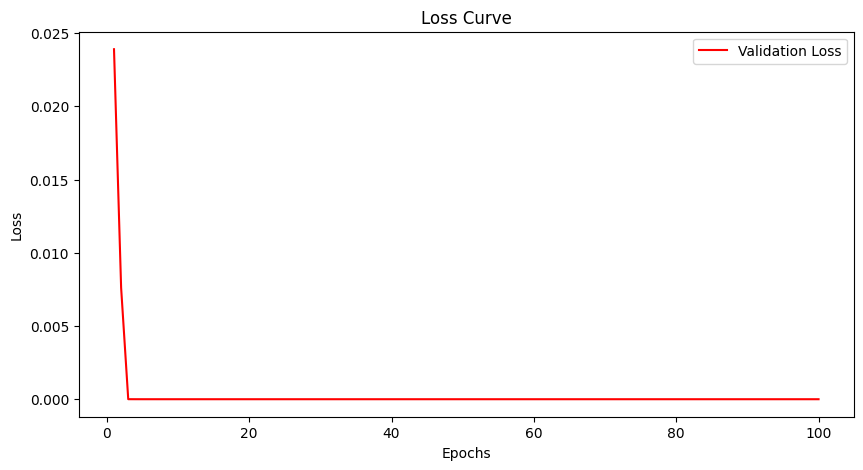

In [182]:
tomita_4_uni_lp .visualize(epochs)

In [40]:
#14. combos: universal + standard

In [41]:
# Tomita 4:
url = 'data/Data_from_paper/Tomita-4'
alibi = False
universal = True
no_posi_encoding = False
rope = False
tomita_4_uni_sin  = Model.run_model(url, learning_rate = 0.001, batch_size = 32, embedding_dim =32, nheads= 8, split = 0.8, optimizer = 'RMSPROP', inner_layer_dim = 32, scheduler_lr= 200000, dropout = 0.1, alibi = alibi, no_posi_encoding= no_posi_encoding, num_layers= 8, rope= rope)

In [42]:
epochs = 100
tomita_4_uni_sin.train_eval(epochs)

Epoch [1/100], Loss: 0.021776, dev Accuracy: 62.55%
Epoch [2/100], Loss: 0.004204, dev Accuracy: 91.55%
Epoch [3/100], Loss: 0.001581, dev Accuracy: 95.45%
Epoch [4/100], Loss: 0.000793, dev Accuracy: 97.60%
Epoch [5/100], Loss: 0.000478, dev Accuracy: 98.40%
Epoch [6/100], Loss: 0.000118, dev Accuracy: 99.70%
Epoch [7/100], Loss: 0.000136, dev Accuracy: 99.60%
Epoch [8/100], Loss: 0.000032, dev Accuracy: 99.90%
Epoch [9/100], Loss: 0.000148, dev Accuracy: 99.55%
Epoch [10/100], Loss: 0.000001, dev Accuracy: 100.00%
Epoch [11/100], Loss: 0.000187, dev Accuracy: 99.45%
Epoch [12/100], Loss: 0.000000, dev Accuracy: 100.00%
Epoch [13/100], Loss: 0.000000, dev Accuracy: 100.00%
Epoch [14/100], Loss: 0.000000, dev Accuracy: 100.00%
Epoch [15/100], Loss: 0.000000, dev Accuracy: 100.00%
Epoch [16/100], Loss: 0.000000, dev Accuracy: 100.00%
Epoch [17/100], Loss: 0.000000, dev Accuracy: 100.00%
Epoch [18/100], Loss: 0.000000, dev Accuracy: 100.00%
Epoch [19/100], Loss: 0.000000, dev Accuracy: 1

In [43]:
bin0_uni[1] = tomita_4_uni_sin.test(0)

accuracy of all bin 0 is:  100.0 %


In [44]:
bin1_uni[1] = tomita_4_uni_sin.test(1)

accuracy of all bin 1 is:  15.7 %


In [45]:
sin_uni, sin_uni_n = tomita_4_uni_sin.get_losses('Universal + Sin')

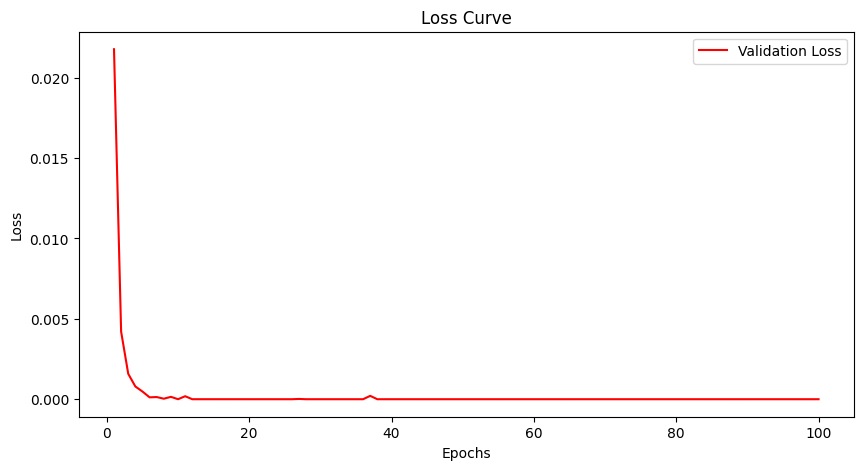

In [46]:
tomita_4_uni_sin.visualize(epochs)

In [47]:
#15. combos: universal + alibi

In [143]:
# Tomita 4:
url = 'data/Data_from_paper/Tomita-4'
alibi = True
universal = True
no_posi_encoding = False
rope = False
tomita_4_uni_alibi = Model.run_model(url, learning_rate = 0.001, batch_size = 32, embedding_dim =64, nheads= 8, split = 0.8, optimizer = 'RMSPROP', inner_layer_dim = 32, scheduler_lr= 200000, dropout = 0.1, alibi = alibi, no_posi_encoding= no_posi_encoding, num_layers= 8, rope= rope)

In [144]:
epochs = 100
tomita_4_uni_alibi.train_eval(epochs)

Epoch [1/100], Loss: 0.011679, dev Accuracy: 70.65%
Epoch [2/100], Loss: 0.009527, dev Accuracy: 73.30%
Epoch [3/100], Loss: 0.009582, dev Accuracy: 73.50%
Epoch [4/100], Loss: 0.011457, dev Accuracy: 48.55%
Epoch [5/100], Loss: 0.011181, dev Accuracy: 73.50%
Epoch [6/100], Loss: 0.007754, dev Accuracy: 73.45%
Epoch [7/100], Loss: 0.011711, dev Accuracy: 73.30%
Epoch [8/100], Loss: 0.010097, dev Accuracy: 73.50%
Epoch [9/100], Loss: 0.011163, dev Accuracy: 73.50%
Epoch [10/100], Loss: 0.011084, dev Accuracy: 73.50%
Epoch [11/100], Loss: 0.014399, dev Accuracy: 73.50%
Epoch [12/100], Loss: 0.008795, dev Accuracy: 48.55%
Epoch [13/100], Loss: 0.009456, dev Accuracy: 48.45%
Epoch [14/100], Loss: 0.011245, dev Accuracy: 73.15%
Epoch [15/100], Loss: 0.058340, dev Accuracy: 22.75%
Epoch [16/100], Loss: 0.041589, dev Accuracy: 10.75%
Epoch [17/100], Loss: 0.021865, dev Accuracy: 48.55%
Epoch [18/100], Loss: 0.026674, dev Accuracy: 18.70%
Epoch [19/100], Loss: 0.015802, dev Accuracy: 72.40%
Ep

In [145]:
bin0_uni[6] =  tomita_4_uni_alibi.test(0)

accuracy of all bin 0 is:  49.35 %


In [146]:
bin1_uni[6] = tomita_4_uni_alibi.test(1)

accuracy of all bin 1 is:  38.25 %


In [147]:
alibi_uni, alibi_uni_n = tomita_4_uni_alibi.get_losses('Universal + ALiBi')

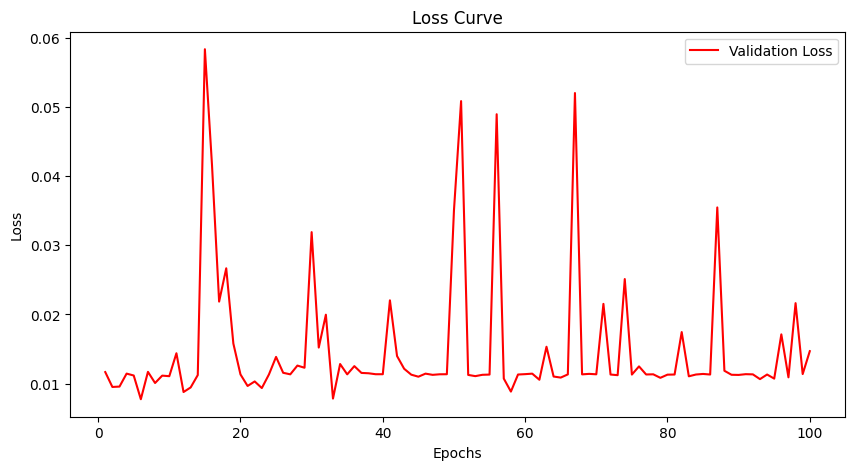

In [148]:
tomita_4_uni_alibi.visualize(epochs)

In [55]:
#16. combos: universal + rope

In [56]:
# Tomita 4:
url = 'data/Data_from_paper/Tomita-4'
alibi = False
universal = True
no_posi_encoding = False
rope = True
tomita_4_uni_rope = Model.run_model(url, learning_rate = 0.001, batch_size = 32, embedding_dim =32, nheads= 8, split = 0.8, optimizer = 'RMSPROP', inner_layer_dim = 32, scheduler_lr= 200000, dropout = 0.0, alibi = alibi, no_posi_encoding= no_posi_encoding, num_layers= 8, rope= rope)

In [57]:
epochs = 100
tomita_4_uni_rope.train_eval(epochs)

Epoch [1/100], Loss: 0.095606, dev Accuracy: 7.50%
Epoch [2/100], Loss: 0.018081, dev Accuracy: 63.90%
Epoch [3/100], Loss: 0.001186, dev Accuracy: 97.10%
Epoch [4/100], Loss: 0.000393, dev Accuracy: 99.00%
Epoch [5/100], Loss: 0.000213, dev Accuracy: 99.60%
Epoch [6/100], Loss: 0.000079, dev Accuracy: 99.80%
Epoch [7/100], Loss: 0.000006, dev Accuracy: 100.00%
Epoch [8/100], Loss: 0.000029, dev Accuracy: 99.90%
Epoch [9/100], Loss: 0.000067, dev Accuracy: 99.80%
Epoch [10/100], Loss: 0.000163, dev Accuracy: 99.60%
Epoch [11/100], Loss: 0.000084, dev Accuracy: 99.75%
Epoch [12/100], Loss: 0.000139, dev Accuracy: 99.70%
Epoch [13/100], Loss: 0.000050, dev Accuracy: 99.85%
Epoch [14/100], Loss: 0.000023, dev Accuracy: 99.95%
Epoch [15/100], Loss: 0.000064, dev Accuracy: 99.85%
Epoch [16/100], Loss: 0.000097, dev Accuracy: 99.80%
Epoch [17/100], Loss: 0.000021, dev Accuracy: 99.95%
Epoch [18/100], Loss: 0.000370, dev Accuracy: 99.20%
Epoch [19/100], Loss: 0.000071, dev Accuracy: 99.85%
Ep

In [58]:
bin0_uni[7] = tomita_4_uni_rope.test(0)

accuracy of all bin 0 is:  99.95 %


In [59]:
bin1_uni[7] = tomita_4_uni_rope.test(1)

accuracy of all bin 1 is:  41.0 %


In [60]:
rope_uni, rope_uni_n = tomita_4_uni_rope.get_losses('Universal + RoPE')

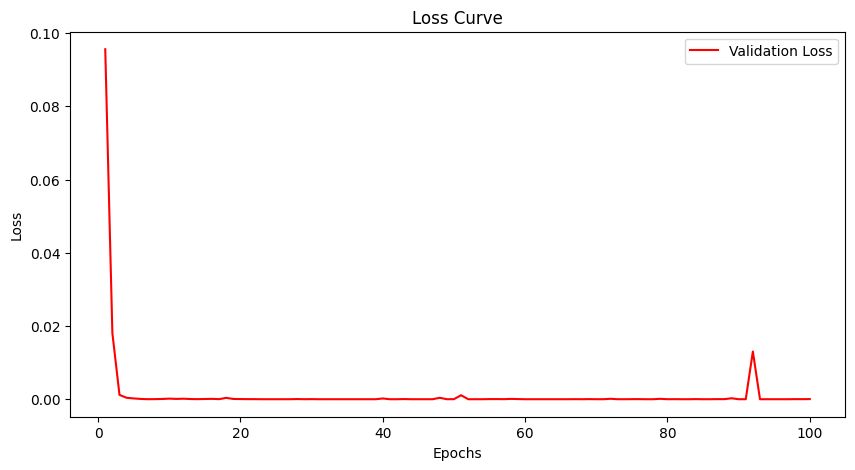

In [61]:
tomita_4_uni_rope.visualize(epochs)

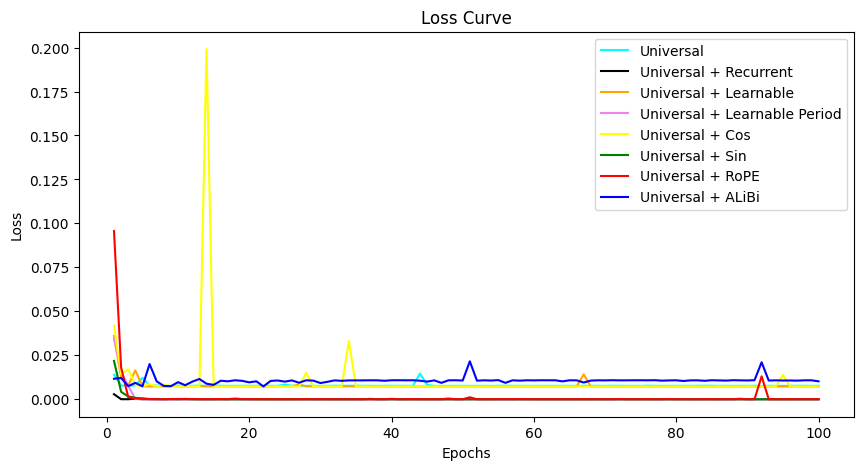

In [75]:
import numpy as np
# plot the losses
epochs = 100
plt.figure(figsize=(10, 5))
plt.plot(np.arange(1, epochs + 1), uni, label=uni_n, color='cyan')
plt.plot(np.arange(1, epochs + 1), rec_uni, label=rec_uni_n, color='black')
plt.plot(np.arange(1, epochs + 1), learn_uni, label=learn_uni_n, color='orange')
plt.plot(np.arange(1, epochs + 1), lp_uni, label=lp_uni_n, color='violet')
plt.plot(np.arange(1, epochs + 1), cos_uni, label=cos_uni_n, color='yellow')
plt.plot(np.arange(1, epochs + 1),sin_uni, label=sin_uni_n, color='green')
plt.plot(np.arange(1, epochs + 1), rope_uni, label=rope_uni_n, color='red')
plt.plot(np.arange(1, epochs + 1), alibi_uni, label=alibi_uni_n, color='blue')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Curve')
plt.legend()
plt.show()

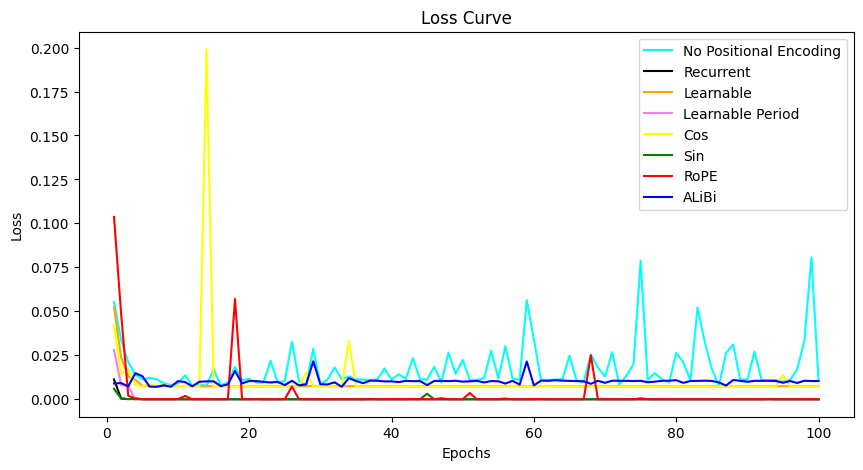

In [168]:
# plot the losses no universal
epochs = 100
plt.figure(figsize=(10, 5))
plt.plot(np.arange(1, epochs + 1), nop, label=nop_n, color='cyan')
plt.plot(np.arange(1, epochs + 1), rec, label=rec_n, color='black')
plt.plot(np.arange(1, epochs + 1), learn, label=learn_n, color='orange')
plt.plot(np.arange(1, epochs + 1), lp, label=lp_n, color='violet')
plt.plot(np.arange(1, epochs + 1), cos, label=cos_n, color='yellow')
plt.plot(np.arange(1, epochs + 1),sin, label=sin_n, color='green')
plt.plot(np.arange(1, epochs + 1), rope, label=rope_n, color='red')
plt.plot(np.arange(1, epochs + 1), alibi, label=alibi_n, color='blue')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Curve')
plt.legend()
plt.show()

In [141]:
bin0.append(100)
bin1.append(92.4)
bin0_uni.append(0)
bin1_uni.append(0)

In [ ]:
#bin0.pop()
#bin1.pop()

[74.7, 100.0, 74.7, 74.7, 100.0, 100.0, 74.7, 100.0, 100]
[55.2, 18.95, 63.75, 76.5, 16.25, 98.8, 76.5, 79.9, 92.4]
[74.7, 100.0, 74.7, 74.7, 100.0, 100.0, 49.35, 99.95, 0]
[72.3, 15.7, 63.75, 67.35, 19.9, 55.05, 38.25, 41.0, 0]


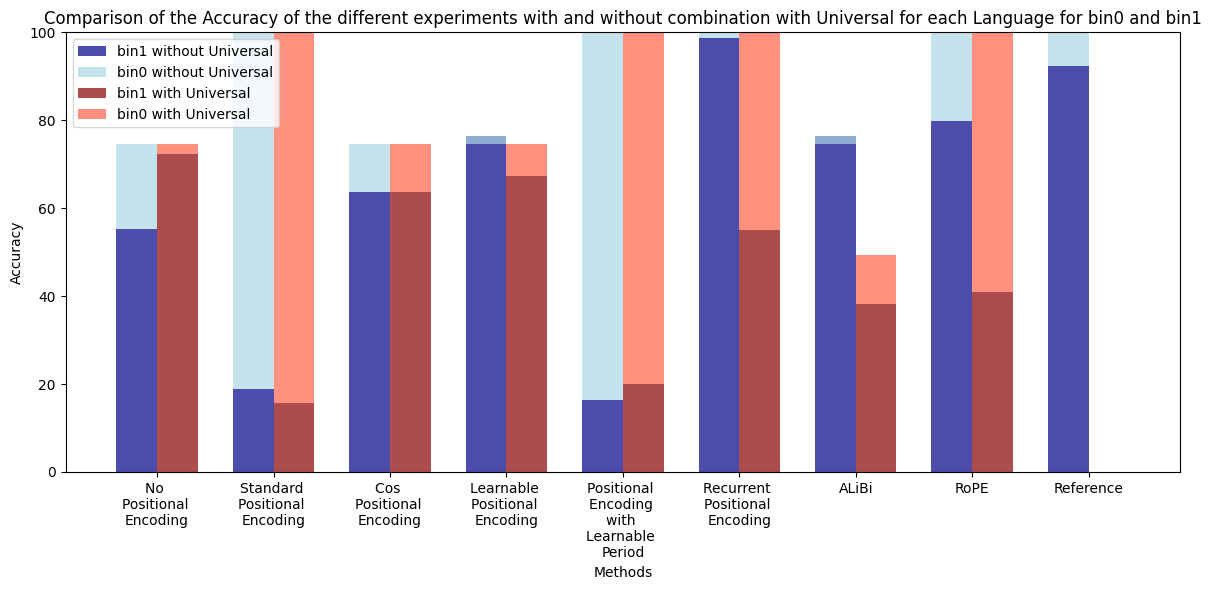

In [189]:
# Plots
categories = ['No \nPositional \nEncoding', 'Standard \nPositional \nEncoding', 'Cos \nPositional \nEncoding', 'Learnable \nPositional \nEncoding', 'Positional \nEncoding \nwith \nLearnable \nPeriod',  'Recurrent \nPositional \nEncoding','ALiBi', 'RoPE', 'Reference']

print(bin0)
print(bin1)
print(bin0_uni)
print(bin1_uni)
# Set the width of each bar
bar_width = 0.35

# Calculate the differences between bin0 and bin1 values
diff_bin0_bin1 = [b0 - b1 for b0, b1 in zip(bin0, bin1)]

# Calculate the differences between bin0_uni and bin1_uni values
diff_bin0_uni_bin1_uni = [b0_uni - b1_uni for b0_uni, b1_uni in zip(bin0_uni, bin1_uni)]

# Create an array of indices for x-axis placement
indices = np.arange(len(categories))

# Create the bar plot for the first pair
plt.figure(figsize=(12, 6))  # Adjust the figure size as needed
plt.bar(indices - bar_width / 2, bin1, bar_width, label='bin1 without Universal', alpha=0.7, color='#00008B')
plt.bar(indices - bar_width / 2, diff_bin0_bin1, bar_width, label='bin0 without Universal', bottom=bin1, alpha=0.7, color='#ADD8E6')


# Create the bar plot for the second pair
plt.bar(indices + bar_width / 2, bin1_uni, bar_width, label='bin1 with Universal', alpha=0.7, color = '#8B0000')
plt.bar(indices + bar_width / 2, diff_bin0_uni_bin1_uni, bar_width, label='bin0 with Universal', bottom=bin1_uni, alpha=0.7, color='#FF6347')

# Customize the plot
plt.xlabel('Methods')
plt.ylabel('Accuracy')
plt.title('Comparison of the Accuracy of the different experiments with and without combination with Universal for each Language for bin0 and bin1')
plt.xticks(indices, categories)
plt.ylim(0, 100)  # Set the y-axis range from 0% to 100% to accommodate both pairs
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()